# Statistical Comparisons

- For a more thorough discussion of the experiments, see [the other notebook](comparisons.ipynb).
- This notebook shows averages over three runs.
- It excludes two of the ablations to not clutter the plots too much.

In [2]:
# internal modules
from utils.plot import binning
# external modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# settings
sns.set_theme(style='dark')

## Deadlock

In [3]:
# config
dir_set = []
dir_nums = [7, 10, 11, 12, 13, 21, 24, 25, 26, 27, 35, 38, 39, 41] # 40 removed because of error
for num in dir_nums:
    dir_set.append('reset_and_deadlock/' + str(num) + '/')
dir_nums = [7, 10, 13, 21, 24, 25, 26, 27, 38] # 11, 12, 35, 39, 40, 41 removed
for num in dir_nums:
    dir_set.append('reset_and_deadlock_2/' + str(num) + '/')
n_bins = 50
zoom = 30
# load
deadlock_data_set = [pd.DataFrame() for _ in dir_set]
deadlock_raw_data_set = [pd.DataFrame() for _ in dir_set]
for i, dir in enumerate(dir_set):
    path = 'results/' + dir
    raw = pd.read_csv(
        path + 'data.csv',
        index_col='time step',
        usecols=['time step', 'reward', 'side effects incidence', 'agent', 'regulatory constraints'],
    )
    deadlock_data_set[i] = binning(raw[:200], 'reward', n_bins, kind='mean')
    deadlock_data_set[i]['side effects incidence'] = binning(raw[:200], 'side effects incidence', n_bins, kind='mean')['side effects incidence']
    deadlock_data_set[i]['algorithm-regulations pair'] = raw['agent'][1] #+ '\n' + raw['regulatory constraints'][1]
    deadlock_raw_data_set[i] = raw[:zoom+1]
    deadlock_raw_data_set[i]['algorithm-regulations pair'] = raw['agent'][1] #+ '\n' + raw['regulatory constraints'][1]
deadlock_data = pd.concat(deadlock_data_set)
deadlock_raw_data = pd.concat(deadlock_raw_data_set)




/tmp/ipykernel_1202717/1650509502.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deadlock_raw_data_set[i]['algorithm-regulations pair'] = raw['agent'][1] #+ '\n' + raw['regulatory constraints'][1]
/tmp/ipykernel_1202717/1650509502.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deadlock_raw_data_set[i]['algorithm-regulations pair'] = raw['agent'][1] #+ '\n' + raw['regulatory constraints'][1]
/tmp/ipykernel_1202717/1650509502.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_1202717/2037219327.py:25: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  reward.legend(new_handle_set, new_label_set, loc='center left', fontsize=10, bbox_to_anchor=(1.1, 0.5), framealpha=0.0)


Text(0.5, 0.98, "'polarisation in recommender engines' environment\ndeadlock variant")

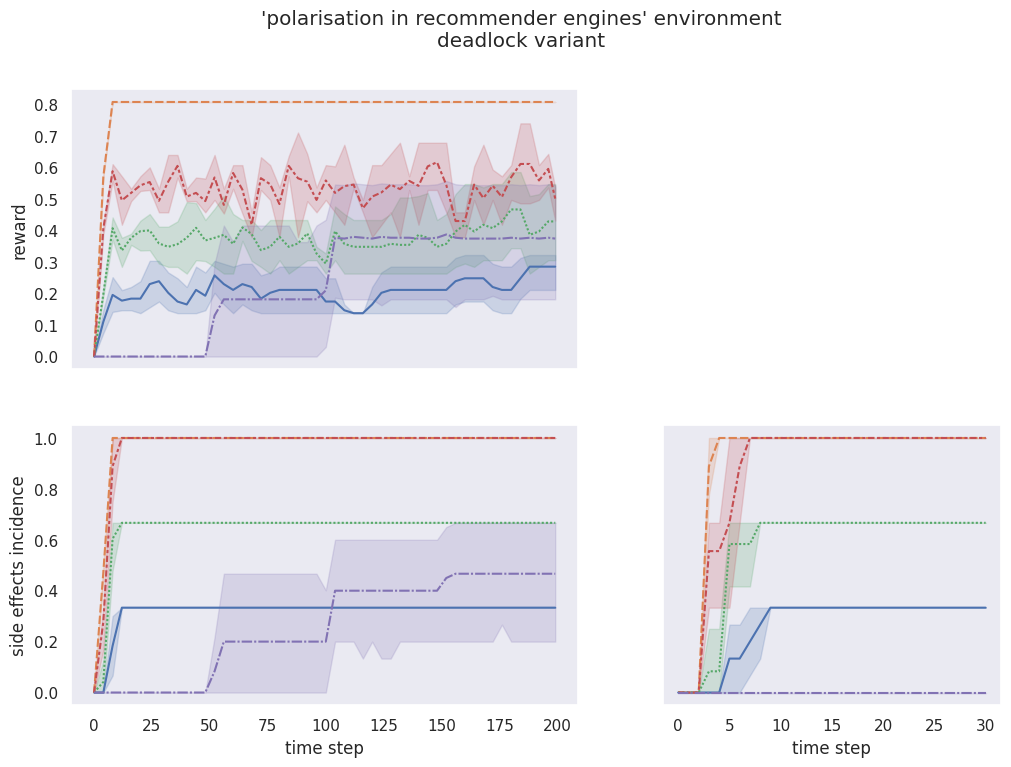

In [4]:
fig, [[reward, text], [side_effects, zoom_in]] = plt.subplots(
    2,
    2,
    sharex='col',
    sharey='row',
    figsize=(12, 8),
    gridspec_kw={'width_ratios': [3, 2]}
)
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='reward',
    ax = reward,
    hue='algorithm-regulations pair',
    style='algorithm-regulations pair',
    legend=False,
).legend(loc='center left', fontsize=10, bbox_to_anchor=(1.1, 0.5))
handle_set, label_set = reward.get_legend_handles_labels()
new_label_set = ['PE-UCRL', 'unsafe baseline', 'AlwaysSafe/PSO', 'AUP', 'Nation-like']
new_handle_set = [[] for _ in new_label_set]
for i, new_label in enumerate(new_label_set):
    for j, label in enumerate(label_set):
        if new_label == label:
            new_handle_set[i] = handle_set[j]
reward.legend(new_handle_set, new_label_set, loc='center left', fontsize=10, bbox_to_anchor=(1.1, 0.5), framealpha=0.0)
text.axis('off')
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='side effects incidence',
    ax = side_effects,
    hue='algorithm-regulations pair',
    style='algorithm-regulations pair',
    legend=False,
)
sns.lineplot(
    data=deadlock_raw_data,
    x='time step',
    y='side effects incidence',
    ax = zoom_in,
    hue='algorithm-regulations pair',
    style='algorithm-regulations pair',
    legend=False,
)
fig.suptitle("'polarisation in recommender engines' environment\ndeadlock variant")

fig, [reward, side_effects] = plt.subplots(
    2,
    1,
    sharex='col',
    sharey='row',
    figsize=(6, 8),
    #gridspec_kw={'width_ratios': [3, 2]}
)
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='reward',
    ax = reward,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
#text.axis('off')
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='side effects incidence',
    ax = side_effects,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
# sns.lineplot(
#     data=deadlock_raw_data,
#     x='time step',
#     y='side effects incidence',
#     ax = zoom_in,
#     hue='agent s.t. regulatory constraints',
#     style='agent s.t. regulatory constraints',
#     legend=False,
# )
fig.suptitle("'polarisation in recommender engines' environment\ndeadlock variant")

## Reset

In [5]:
# config
dir_set = []
dir_nums = [0, 3, 4, 5, 6, 14, 17, 18, 19, 20, 28, 31, 32, 34] # 33 removed because of error
for num in dir_nums:
    dir_set.append('reset_and_deadlock/' + str(num) + '/')
dir_nums = [0, 3, 4, 5, 14, 17, 18, 28, 31, 32] # 6, 19, 20, 33, 34 removed
n_bins = 50
zoom = 30
# load
data_set = [pd.DataFrame() for _ in dir_set]
raw_data_set = [pd.DataFrame() for _ in dir_set]
for i, dir in enumerate(dir_set):
    path = 'results/' + dir
    raw = pd.read_csv(
        path + 'data.csv',
        index_col='time step',
        usecols=['time step', 'reward', 'side effects incidence', 'agent', 'regulatory constraints'],
    )
    data_set[i] = binning(raw, 'reward', n_bins, kind='mean')
    data_set[i]['side effects incidence'] = binning(raw, 'side effects incidence', n_bins, kind='mean')['side effects incidence']
    raw_data_set[i] = raw[:zoom+1]
    if raw['agent'][1] == 'unsafe baseline':
        data_set[i]['algorithm'] = 'Cellular UCRL'
        raw_data_set[i]['algorithm'] = 'Cellular UCRL'
        data_set[i]['algorithm-regulations pair'] = 'Cellular UCRL'
        raw_data_set[i]['algorithm-regulations pair'] = 'Cellular UCRL'
    else:
        data_set[i]['algorithm'] = raw['agent'][1]
        raw_data_set[i]['algorithm'] = raw['agent'][1]
        data_set[i]['algorithm-regulations pair'] = raw['agent'][1] #+ '\n' + raw['regulatory constraints'][1]
        raw_data_set[i]['algorithm-regulations pair'] = raw['agent'][1] #+ '\n' + raw['regulatory constraints'][1]
data = pd.concat(data_set)
raw_data = pd.concat(raw_data_set)


/tmp/ipykernel_1202717/931354750.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_set[i]['algorithm'] = raw['agent'][1]
/tmp/ipykernel_1202717/931354750.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_set[i]['algorithm-regulations pair'] = raw['agent'][1] #+ '\n' + raw['regulatory constraints'][1]
/tmp/ipykernel_1202717/931354750.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Text(0.5, 0.98, 'reset variant')

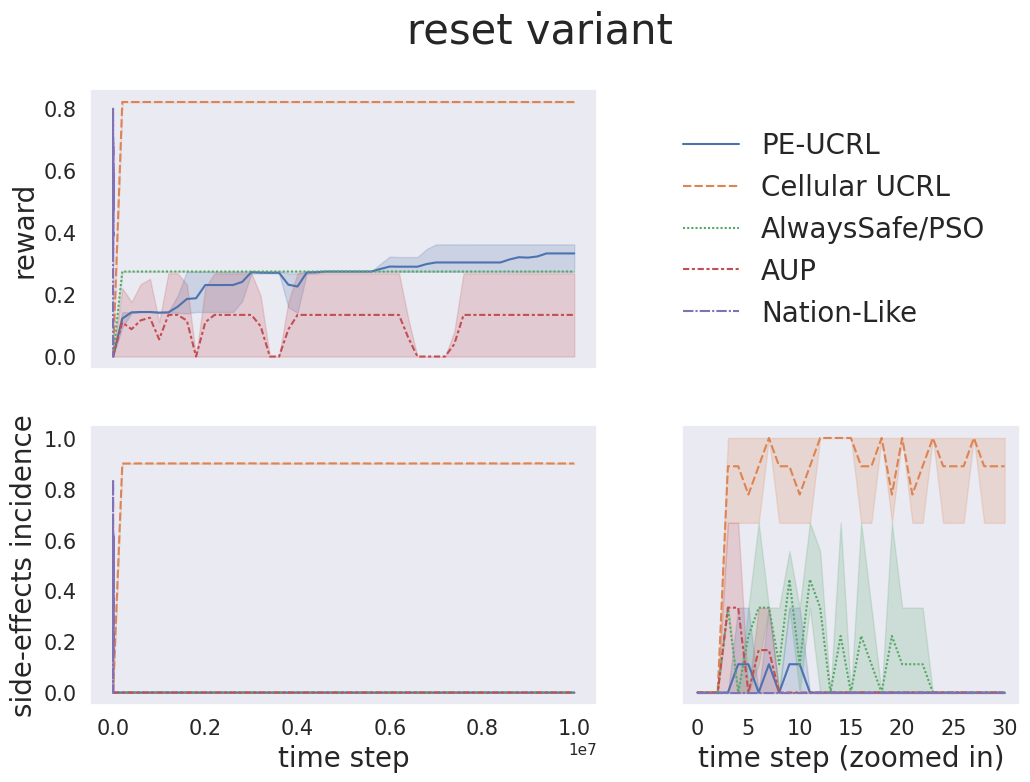

In [6]:

fig, [[reward, text], [side_effects, zoom_in]] = plt.subplots(
    2,
    2,
    sharex='col',
    sharey='row',
    figsize=(12, 8),
    gridspec_kw={'width_ratios': [3, 2]}
)
sns.lineplot(
    data=data.replace('Nation-like', 'Nation-Like'),
    x='time step',
    y='reward',
    ax = reward,
    hue='algorithm',
    style='algorithm',
    legend=True,
).legend(loc='center left', fontsize=20, bbox_to_anchor=(1.12, 0.5), frameon=False)
reward.tick_params(axis='both', which='major', labelsize=15)
reward.set_ylabel('reward', fontsize=20)
text.axis('off')
sns.lineplot(
    data=data,
    x='time step',
    y='side effects incidence',
    ax = side_effects,
    hue='algorithm',
    style='algorithm',
    legend=False,
)
side_effects.tick_params(axis='both', which='major', labelsize=15)
side_effects.set_xlabel('time step', fontsize=20)
side_effects.set_ylabel('side-effects incidence', fontsize=20)
sns.lineplot(
    data=raw_data,
    x='time step',
    y='side effects incidence',
    ax = zoom_in,
    hue='algorithm',
    style='algorithm',
    legend=False,
)
zoom_in.tick_params(axis='both', which='major', labelsize=15)
zoom_in.set_xlabel('time step (zoomed in)', fontsize=20)
fig.suptitle("reset variant", fontsize=30)

In [4]:
all_data_set = [deadlock_data, data, deadlock_raw_data, raw_data]
all_data_set[0]['environment'] = 'deadlock'
all_data_set[1]['environment'] = 'reset'
all_data_set[2]['environment'] = 'deadlock'
all_data_set[2] = all_data_set[2].rename(columns={'time step': 'time step (zoom)'})
all_data_set[3]['environment'] = 'reset'
all_data_set[3] = all_data_set[3].rename(columns={'time step': 'time step (zoom)'})
all_data = pd.concat(all_data_set)
print(all_data)


   time step    reward side effects incidence algorithm-regulations pair  \
0          0       0.0                    0.0                    PE-UCRL   
1          4   0.11916                    0.0                    PE-UCRL   
2          8   0.11916                    0.0                    PE-UCRL   
3         12  0.243862               0.333333                    PE-UCRL   
4         16   0.18361               0.333333                    PE-UCRL   
..       ...       ...                    ...                        ...   
26       NaN       0.0                    0.0                Nation-like   
27       NaN       0.0                    0.0                Nation-like   
28       NaN       0.0                    0.0                Nation-like   
29       NaN       0.0                    0.0                Nation-like   
30       NaN       0.0                    0.0                Nation-like   

   environment        agent                          regulatory constraints  
0     dea

In [5]:
all_data['algorithm-regulations pair'] = all_data['algorithm-regulations pair'].replace('PE-UCRL', '(PE-UCRL, P[XX(N_all<=1)<=0.5])')
all_data['algorithm-regulations pair'] = all_data['algorithm-regulations pair'].replace('unsafe baseline', '(Cellular UCRL, n/a)')
all_data['algorithm-regulations pair'] = all_data['algorithm-regulations pair'].replace('Nation-like', '(Nation-Like, 0.2 ... 50 ...)')
all_data['algorithm-regulations pair'] = all_data['algorithm-regulations pair'].replace('AlwaysSafe/PSO', '(AlwaysSafe/PSO, children ...)')
all_data['algorithm-regulations pair'] = all_data['algorithm-regulations pair'].replace('AUP', '(AUP, 10 ... 1 ...)')
print(all_data.loc[(all_data['environment'] == 'deadlock')])

   time step    reward side effects incidence  \
0          0       0.0                    0.0   
1          4   0.11916                    0.0   
2          8   0.11916                    0.0   
3         12  0.243862               0.333333   
4         16   0.18361               0.333333   
..       ...       ...                    ...   
26       NaN  0.807355                    1.0   
27       NaN  0.807355                    1.0   
28       NaN  0.807355                    1.0   
29       NaN  0.807355                    1.0   
30       NaN  0.807355                    1.0   

         algorithm-regulations pair environment            agent  \
0   (PE-UCRL, P[XX(N_all<=1)<=0.5])    deadlock              NaN   
1   (PE-UCRL, P[XX(N_all<=1)<=0.5])    deadlock              NaN   
2   (PE-UCRL, P[XX(N_all<=1)<=0.5])    deadlock              NaN   
3   (PE-UCRL, P[XX(N_all<=1)<=0.5])    deadlock              NaN   
4   (PE-UCRL, P[XX(N_all<=1)<=0.5])    deadlock              NaN   
.. 

/home/henrik/Environments/py3env/lib/python3.10/site-packages/seaborn/_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

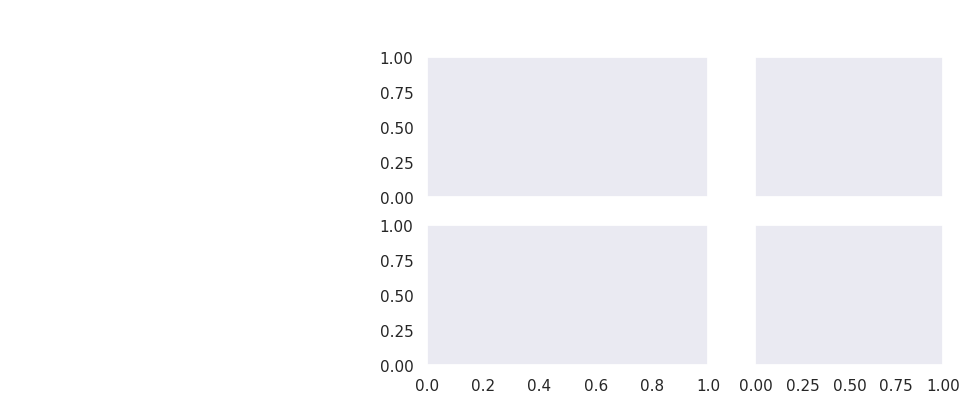

In [6]:
fig = plt.figure(
    figsize=(10, 4),
)
[deadlock, reset] = fig.subfigures(
    1,
    2,
    width_ratios=[1, 2],
)

[[reward, text], [side_effects, zoom_in]] = reset.subplots(
    2,
    2,
    sharex='col',
    sharey='row',
    gridspec_kw={'width_ratios': [3, 2]}
)
sns.lineplot(
    data=all_data.loc[(all_data['environment'] == 'reset')],
    x='time step',
    y='reward',
    ax = reward,
    hue='algorithm-regulations pair',
    style='algorithm-regulations pair',
    legend=True,
).legend(loc='center left', fontsize=10, bbox_to_anchor=(1.1, 0.5))
text.axis('off')
sns.lineplot(
    data=all_data.loc[(all_data['environment'] == 'reset')],
    x='time step',
    y='side effects incidence',
    ax = side_effects,
    hue='algorithm-regulations pair',
    style='algorithm-regulations pair',
    legend=False,
)
# sns.lineplot(
#     data=all_data.loc[(all_data['environment'] == 'reset')],
#     x='time step (zoom)',
#     y='side effects incidence',
#     ax = zoom_in,
#     hue='algorithm-regulations pair',
#     style='algorithm-regulations pair',
#     legend=False,
# )
# reset.suptitle("reset variant")


[deadlock_reward, deadlock_side_effects] = deadlock.subplots(
    2,
    1,
    sharex='col',
    sharey='row',
)
sns.lineplot(
    data=all_data.loc[(all_data['environment'] == 'deadlock')],
    x='time step',
    y='reward',
    ax = deadlock_reward,
    hue='algorithm-regulations pair',
    style='algorithm-regulations pair',
    legend=False,
)
sns.lineplot(
    data=all_data.loc[(all_data['environment'] == 'deadlock')],
    x='time step',
    y='side effects incidence',
    ax = deadlock_side_effects,
    hue='algorithm-regulations pair',
    style='algorithm-regulations pair',
    legend=False,
)
deadlock.suptitle("deadlock variant")

#fig.suptitle("'polarisation in recommender engines' environment")

plt.show()